# Quickstart: Parsing and Plotting
This example shows the most basic steps to get from a raw BioLector data file to an interactive visualization.

In [1]:
import pandas
import ipywidgets
from matplotlib import pyplot, cm

import bletl

In 98 % of the cases, you will use the `bletl.parse` function to load data.

The function comes with a few arguments that you can use to override calibration settings if your raw data file for example does not specify the correct `lot_number`.

To learn all about the different options, run `help(bletl.parse)` or `bletl.parse?`.

## Parsing
In this quickstart, we load a raw data file from the test suite:

In [2]:
bldata = bletl.parse(r"..\tests\data\BLPro\213-NT_1500rpm_30C_20min--2019-10-18-14-55-15.csv")
# just display the variable containing the data
bldata

BLData(model=BLPro) {
  "BS4": FilterTimeSeries(197 cycles, 48 wells),
  "pH": FilterTimeSeries(197 cycles, 48 wells),
  "DO": FilterTimeSeries(197 cycles, 48 wells),
  "GFP-Gemini": FilterTimeSeries(197 cycles, 48 wells),
  "eYFP - Citrine": FilterTimeSeries(197 cycles, 48 wells),
}

As you can see in the above, the returned `BLData` object is a dictionary that maps identifiers of filtersets to `FilterTimeSeries` objects.

## Metadata

Additional properties, such as `comments`, `environment` or `filtersets` contain data that is not specific to a well:

In [3]:
bldata.filtersets.head()

,filter_number,filter_name,filter_id,filter_type,excitation,emission,gain,gain_1,gain_2,phase_statistic_sigma,signal_quality_tolerance,reference_gain,reference_value,calibration,emission2
1,1,Biomass4,201,Intensity,None,None,NaN,4.0,1.0,None,None,NaN,NaN,,None
2,2,pH(HP8),202,pH,None,None,7.0,7.0,1.0,None,None,NaN,100.000000,1924_comp,None
3,3,DO(PSt3),203,DO,None,None,7.0,7.0,1.0,None,None,NaN,100.000000,1924_comp,None
4,4,GFP-Gemini,204,Intensity,None,None,NaN,7.0,1.0,None,None,3.0,135.641129,,None
5,5,eYFP - Citrine,215,Intensity,None,None,NaN,7.0,1.0,None,None,6.0,160.436661,,None


In [4]:
bldata.environment.head()

,cycle,time,temp_setpoint,temp_up,temp_down,temp_water,o2,co2,humidity,shaker_setpoint,shaker_actual
5,1,0.013056,None,28.6,29.3,27.8,25.02,-9999.0,76.17,None,1500.0
156,1,0.076389,None,29.9,29.9,30.4,33.20,-9999.0,84.86,None,1500.0
207,1,0.095833,None,29.9,29.9,31.9,34.42,-9999.0,85.36,None,1499.0
285,2,0.346389,None,30.0,29.9,31.0,35.01,-9999.0,85.09,None,1499.0
436,2,0.409167,None,29.9,29.9,32.9,35.10,-9999.0,85.71,None,1500.0


## Accessing and Visualizing Measurements
Depending on what you want to do, you can retrieve measurement data as tuples of Numpy arrays:
+ `bldata.get_timeseries`
+ `bldata["pH"].get_timeseries`

or as pandas DataFrames:
+ `bldata.get_narrow_data`
+ `bldata.get_unified_narrow_data`
+ `bldata["pH"].get_unified_dataframe`

or via the underlying DataFrames that separate time and value:
+ `bldata["pH"].time`
+ `bldata["pH"].value`

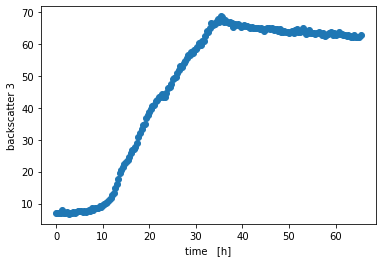

In [5]:
# here we retrieve it as numpy arrays, becase that's very convenient for plotting
t, bs = bldata.get_timeseries("BS4", "A02")

pyplot.scatter(t, bs)
pyplot.xlabel('time   [h]')
pyplot.ylabel('backscatter 3')
pyplot.show()

### Interactivity
With the `ipywidgets` package, one can easily create interactive visualizations.

Here, the plotting code from above is wrapped into a `plot_one_well` function that takes `filterset` and `well` as arguments.

The `ipywidgets.interact` or `ipywidgets.interact_manual` function is then used to create an interactive visualization, where all the available filtersets/wells are passed as options.

In [6]:
def plot_one_well(filterset, well):
    time, value = bldata.get_timeseries(filterset, well)
    
    fig, ax = pyplot.subplots()
    ax.scatter(time, value)
    ax.set_ylabel(filterset)
    ax.set_xlabel("time   [h]")
    ax.set_title(well)
    pyplot.show()
    return

ipywidgets.interact(
    plot_one_well,
    filterset=list(bldata.keys()),
    well=list(bldata["pH"].time.columns),
);

interactive(children=(Dropdown(description='filterset', options=('BS4', 'pH', 'DO', 'GFP-Gemini', 'eYFP - Citr…

<function __main__.plot_one_well(filterset, well)>

That's it with the basic tutorial!
To learn more about what `bletl` can do, checkout the other examples.

Also remember to use `help(...)` and `dir(...)` to read the attributes/methods/docstrings. They often contain more detailed information than example notebooks.

In [7]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Jul 02 2021

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

pandas    : 1.2.1
bletl     : 1.0.0
matplotlib: 3.3.2
ipywidgets: 7.6.3

Watermark: 2.1.0

